# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если набран как минимум 1 балл.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект:
- заполняете данный ноутбук
- создаете приватный репозиторий в GitHub
- добавляете в него проверяющего
- загружаете заполненный ноутбук в отдельную ветку
- создаете MR с указанием проверяющего

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

## 1. Данные (2 балла)

Скачиваем данные для работы:

Начнем с необходимых приготовлений.

In [6]:
%%bash
gdown 1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM

Downloading...
From: https://drive.google.com/uc?id=1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 83.3MB/s]


In [7]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [8]:
coins = pd.read_csv('coins.csv')
coins = coins.set_index('date')

Посмотрим что получилось

In [9]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [10]:
count_coins = coins['name'].nunique()
print(count_coins)

70


### 2. За какой период данные мы имеем? (0.4 балла)

In [11]:
start_date = coins.index.min()
final_date = coins.index.max()
print(f"From: {start_date}")
print(f"to: {final_date}")

From: 2013-04-28
to: 2018-06-06


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [12]:
empty_data = coins.isnull().sum()
print("Да, пропуски есть:")
print(empty_data)
print("-------------------")
print("Учитывая, что есть колонки, в которых пропусков вообще нет")
print("(и их большинство), можно утвержать, что они скорее всего вызваны ")
print("отсутствием данных для определенной даты на ресурсе, откуда эти данные ")
print(" были взяты")


Да, пропуски есть:
price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64
-------------------
Учитывая, что есть колонки, в которых пропусков вообще нет
(и их большинство), можно утвержать, что они скорее всего вызваны 
отсутствием данных для определенной даты на ресурсе, откуда эти данные 
 были взяты


### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [13]:
max_line = coins.loc[coins['price'] == coins['price'].max(), 'name']
print(max_line)

date
2017-12-17    Bitcoin
Name: name, dtype: object


### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Постройте круговую диаграмму с долями. (0.5 балла)

Наибольшая средняя капитализация у Bitcoin
Наименьшая средняя капитализация у KingN Coin


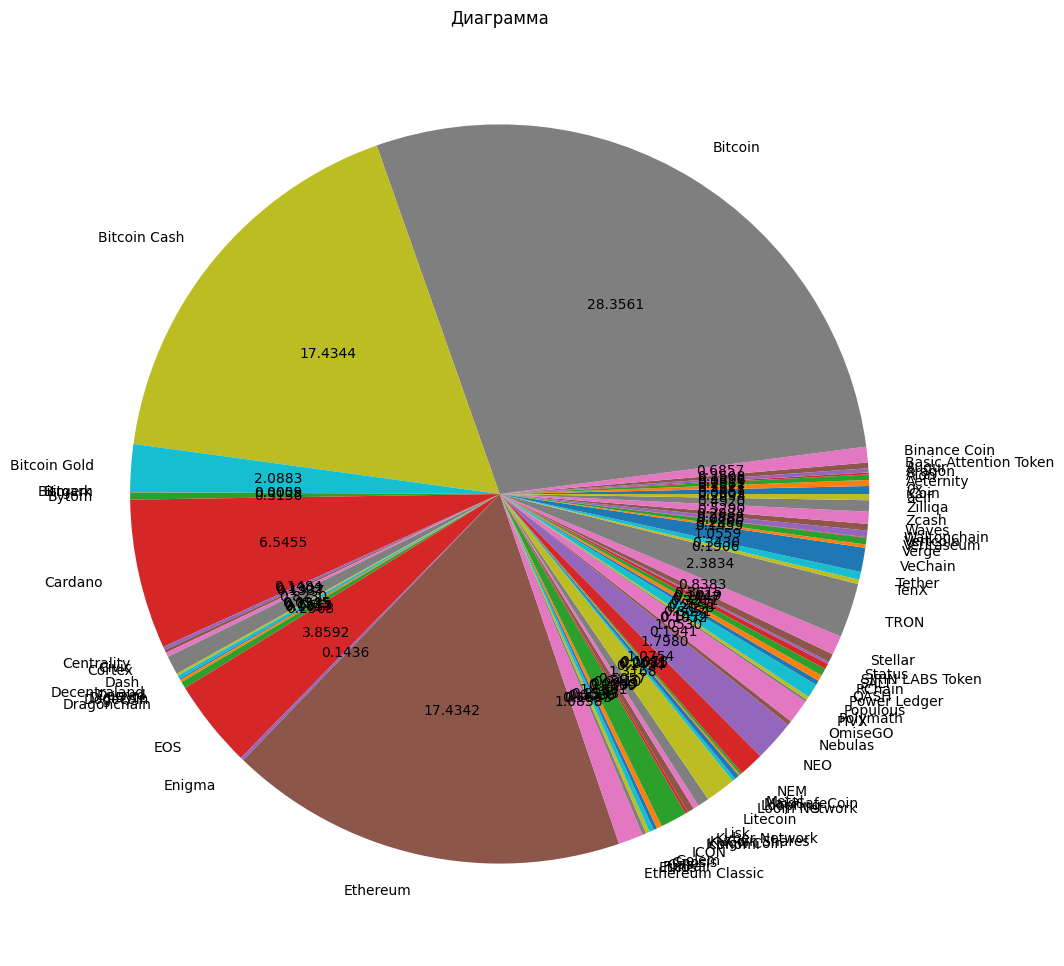

In [14]:
average_markets = coins.groupby(['name'])['market'].mean()
print(f"Наибольшая средняя капитализация у {average_markets.idxmax()}")
print(f"Наименьшая средняя капитализация у {average_markets.idxmin()}")

total = average_markets.sum()
average_percentage = average_markets / total

plt.figure(figsize=(12, 12))
plt.pie(average_percentage, labels=average_percentage.index, autopct='%.4f')
plt.title("Диаграмма")
plt.show()

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `candlestick_ohlc` (`from mplfinance.original_flavor import candlestick_ohlc`), но можно и без него.

In [15]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    date_range = coins[(coins.index >= start_date) &
                       (coins.index <= end_date) &
                       (coins['symbol'] == symbol)]

    fig = plt.figure(figsize=(20, 8))
    ax = fig.add_subplot(111)

    # Чтобы даты не налазили друг на друга:
    ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=5))

    # Сама цена
    ax.plot_date(date_range.index, date_range['price'], fmt='-')

    # Область (красная) между наивысшей и наименьшей ценой
    ax.fill_between(
        date_range.index,
        date_range['high'],
        date_range['low'],
        color='red',
        alpha=0.2)
    # Область (желтая) между ценой начала дня и ценой конца дня
    ax.fill_between(
        date_range.index,
        date_range['open'],
        date_range['close'],
        color='yellow',
        alpha=0.2)

    ax.set_title(f'Визуализация {symbol}')
    ax.set_xlabel('Дата')
    ax.set_ylabel('Цена')

    ax.grid(True)

    plt.show()

Посмотрим, что получилось:

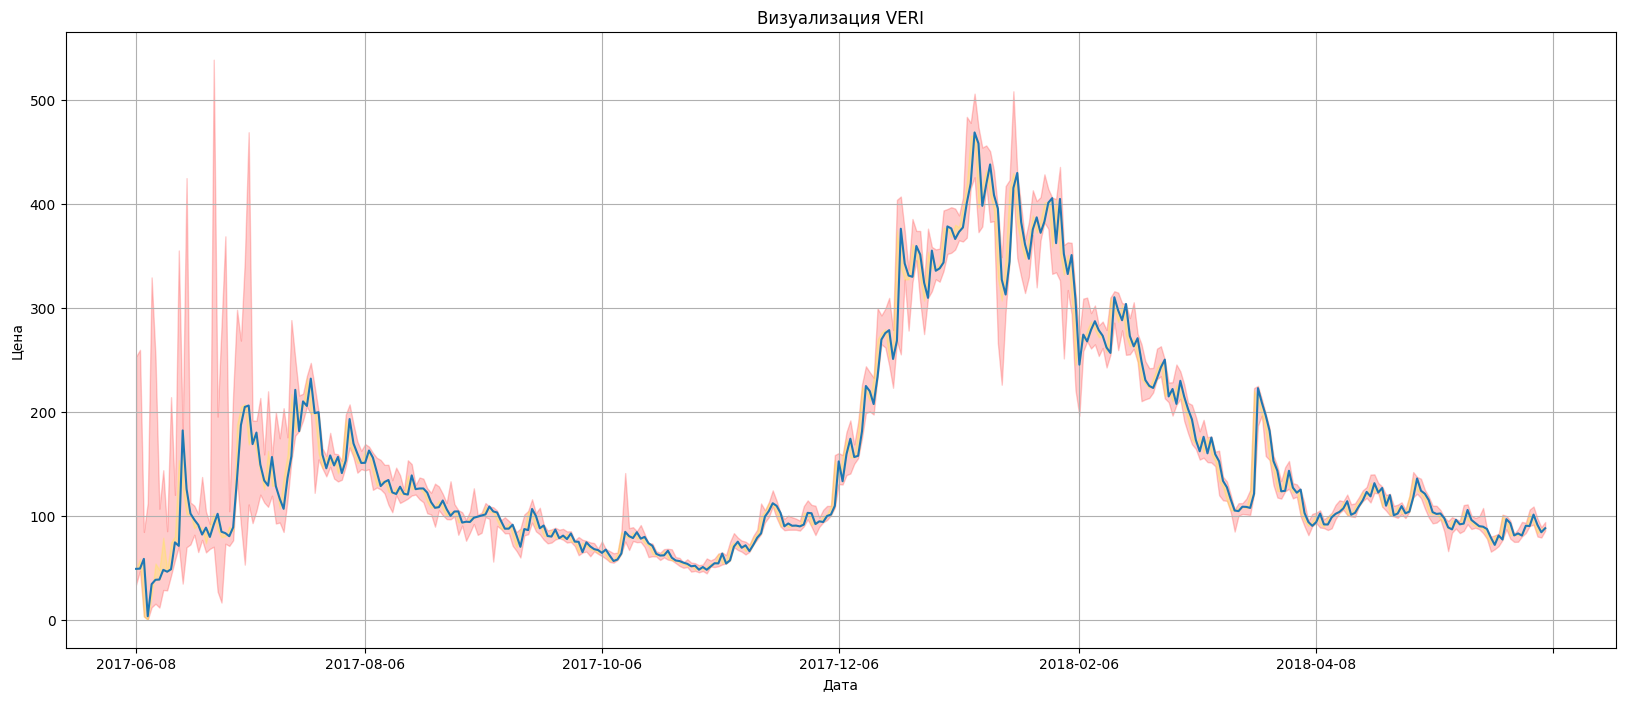

In [16]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')


Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс).

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [17]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    date_range = coins[(coins.index >= start_date) &
                       (coins.index <= end_date) &
                       (coins['symbol'] == symbol)]

    pnd = date_range['high'] / np.maximum(date_range['open'], date_range['close'])
    max_pnd = pnd[pnd.idxmax()]

    # Проверка, что всё правильно (можно раскомментировать):
    #print(pnd)
    #print("----------")
    #new = date_range.loc[:, ['high', 'open', 'close']]
    #print(new)
    #print("----------")

    print(f'День с максимальным pnd: {pnd.idxmax()}')
    print(f'Значение pnd в этот день: {max_pnd}')

In [18]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

День с максимальным pnd: 2017-11-29
Значение pnd в этот день: 1.1428940004366206


Сравните эти значения для разных монет:

In [19]:
print("LTC:")
find_most_severe_pump_and_dump(coins, symbol='LTC', start_date='2014-06-01', end_date='2018-06-01')
print("ETH:")
find_most_severe_pump_and_dump(coins, symbol='ETH', start_date='2014-06-01', end_date='2018-06-01')

LTC:
День с максимальным pnd: 2014-08-04
Значение pnd в этот день: 1.4549071618037137
ETH:
День с максимальным pnd: 2015-08-07
Значение pnd в этот день: 1.2508833922261484


## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени.

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [20]:
# Считаем, что покупаем и продаём монеты за среднюю цену за день
def compute_roi(coins, investments, start_date, end_date):
    start_line = coins.loc[start_date]
    end_line = coins.loc[end_date]

    start_size = 0
    end_size = 0
    for name in investments:
        start_size += investments[name]
        first_price = start_line[start_line['symbol'] == name]['price'].item()
        last_price = end_line[end_line['symbol'] == name]['price'].item()
        #print(f"{name}: fst: {first_price}, lst: {last_price}")
        end_size += investments[name] * (last_price / first_price)

    delta = (end_size - start_size) / start_size
    print(f"ROI составляет: {delta * 100}%")


In [21]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

ROI составляет: -3.5569133065275613%


In [22]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

ROI составляет: 5128.330296529592%


## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто:

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [23]:
def plot_bollinger_bands(coins, symbol, window, width):
    date_range = coins[coins['symbol'] == symbol]

    fig = plt.figure(figsize=(20, 8))
    ax = fig.add_subplot(111)

    # Чтобы даты не налазили друг на друга:
    ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=5))

    # Сама цена:
    ax.plot(date_range.index, date_range['price'], color='blue', label="Цена")
    # Скользящее среднее:
    MA = date_range['price'].rolling(window=window).mean()
    ax.plot(date_range.index, MA, color='orange', label="Скользящее среднее")
    # Границы Боллинджера:
    std = date_range['price'].rolling(window=window).std()
    upp_bord = MA + width * std
    low_bord = MA - width * std
    ax.plot(date_range.index, upp_bord, color='red',
            label="Граница Боллинджера")
    ax.plot(date_range.index, low_bord, color='red')

    ax.set_title(f'Анализ {symbol}')
    ax.set_xlabel('Даты')
    ax.set_ylabel('Цена')
    ax.legend(loc='upper left')

    plt.show()

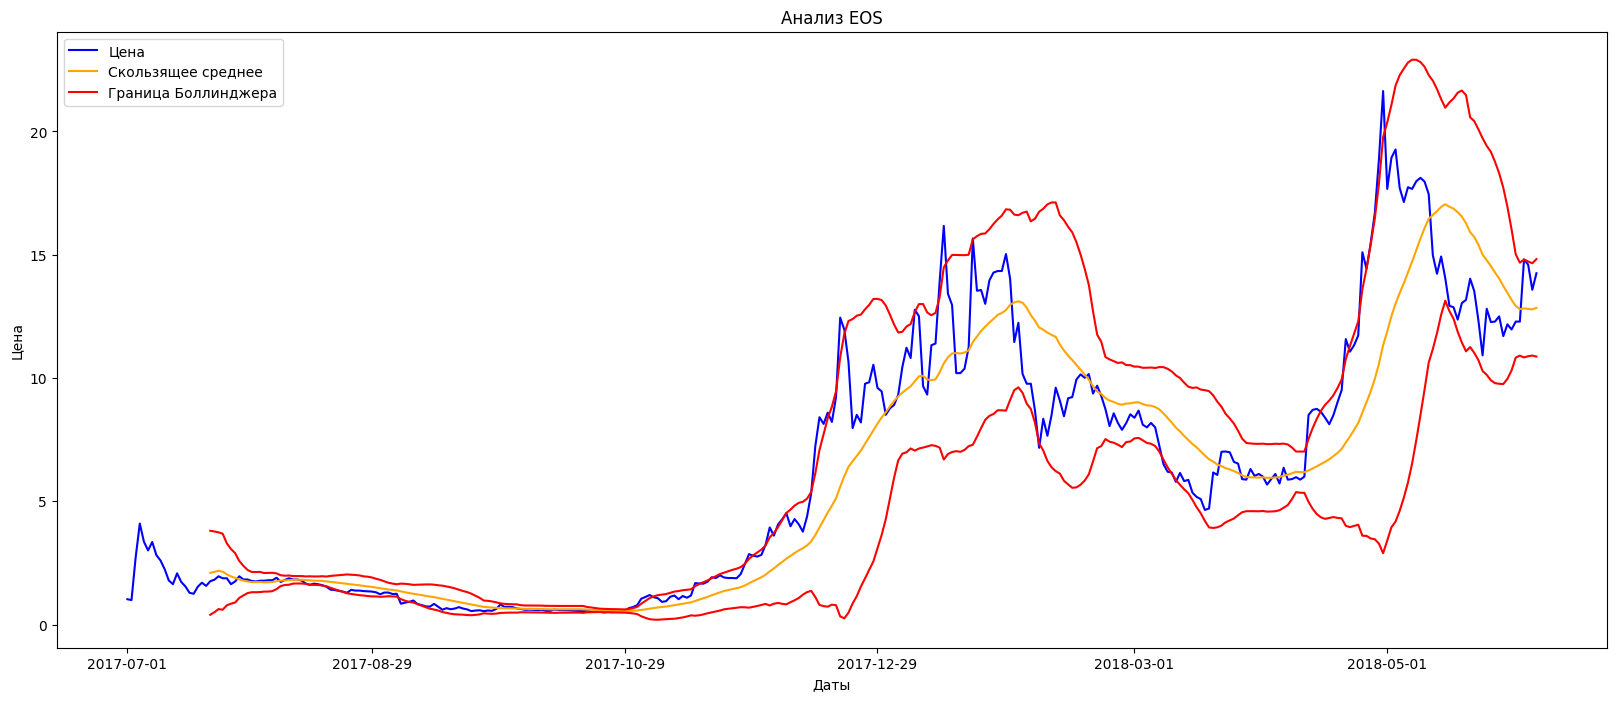

In [24]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

**Ваш ответ тут**

На данном отрезке правило Боллинджера выполнялось, т.к. как только график выходил за пределы границ Боллинджера, он стремился вернуться в пределы границ (и возвращался).

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка.

При этом используйте данные начиная с 2017-07-01.

In [25]:
def plot_coins_capitalizations(coins, symbols, start_date):
    date_range = coins[coins.index >= start_date]

    # 1-ый график
    fig = plt.figure(figsize=(20, 8))
    ax = fig.add_subplot(111)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=5))

    for name in symbols:
        coin_func = date_range[date_range['symbol'] == name]['market']
        ax.plot(coin_func.index, coin_func, label=name)

    ax.set_title('Общая капитализация')
    ax.set_xlabel('Даты')
    ax.set_ylabel('Капитализация')
    ax.legend(loc='upper left')
    plt.show()

    # 2-ой график
    fig = plt.figure(figsize=(20, 8))
    ax = fig.add_subplot(111)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=5))

    coin_names = coins['symbol'].unique()
    total_cap = pd.Series()
    for name in coin_names:
        coin = date_range[date_range['symbol'] == name]['market']
        total_cap = total_cap.add(coin, fill_value=0)

    for name in symbols:
        coin_func = date_range[date_range['symbol'] == name]['market'] / total_cap
        ax.plot(coin_func.index, coin_func, label=name)

    ax.set_title('Доля капитализации от общей капитализации рынка')
    ax.set_xlabel('Даты')
    ax.set_ylabel('Доля капитализации')
    ax.legend(loc='upper left')
    plt.show()

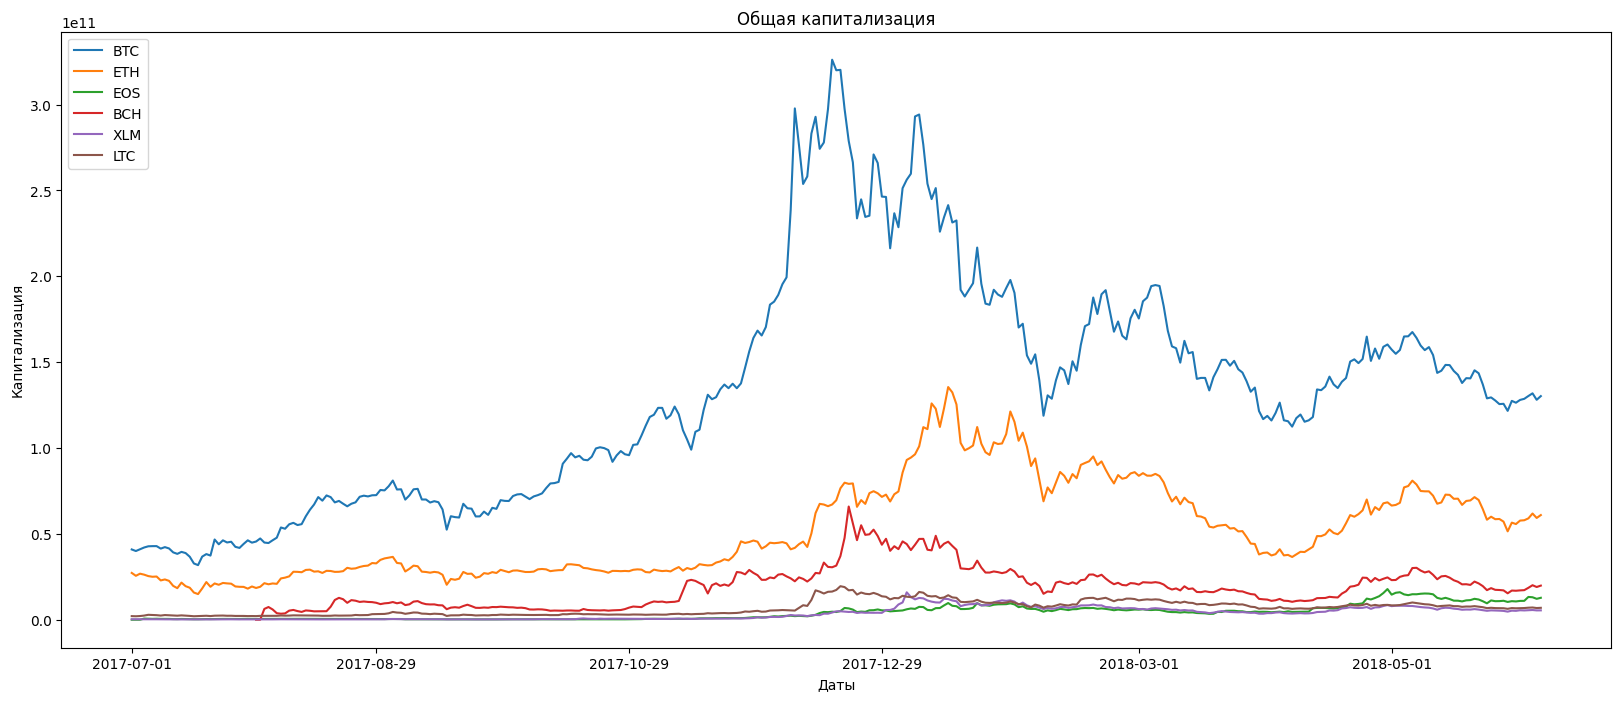

<ipython-input-25-4464300b883a>:25: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  total_cap = pd.Series()


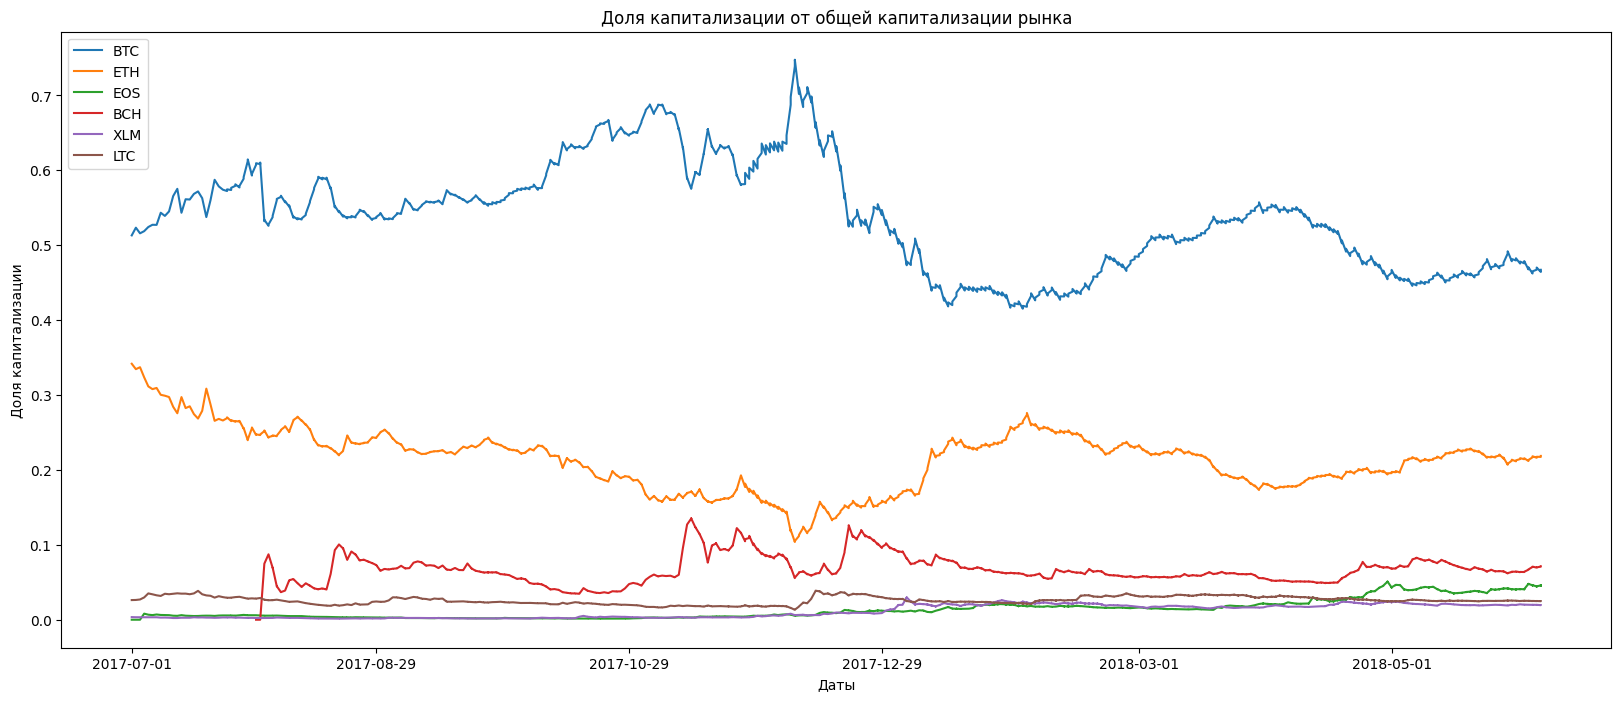

In [26]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

**Ваш ответ тут**
Когда доля биткоина растёт, то доли остальных криптовалют падают и наоборот. Эта зависимость может быть вызвана тем, что само по себе есть разделение криптовалют на биткоин (основная криптовалюта, которая обычно наиболее стабильная среди криптовалют) и альткоины и инвесторы, когда инвестируют, инвестируют либо в биткоин (увеличивая его долю) либо в несколько альткоинов разом (увеличивая долю нескольких одновременно)

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [31]:
#!!!!!!!!!! Посмотреть и переделать
def calc_coins_correlations(coins, date, symbols, window, alpha):

    # Получаем данные для указанных монет (мб что то сделать с isin и copy)
    data_range = coins[(coins['symbol'].isin(symbols)) & (coins.index <= date)].copy()

    tmp = pd.DataFrame()

    for symbol in symbols:
        tmp[symbol] = data_range[data_range['symbol'] == symbol]['market'].ewm(alpha=alpha, adjust=True).mean()

    correlations = tmp.corr()
    return correlations

In [32]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-32-5cb301b2dfa8>:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,0.94,0.56,0.95,0.86,0.98,0.75
ETH,0.94,1.00,0.74,0.81,0.94,0.96,0.94
EOS,0.56,0.74,1.00,0.55,0.84,0.67,0.54
BCH,0.95,0.81,0.55,1.00,0.74,0.89,0.83
XLM,0.86,0.94,0.84,0.74,1.00,0.92,0.91
LTC,0.98,0.96,0.67,0.89,0.92,1.00,0.85
ADA,0.75,0.94,0.54,0.83,0.91,0.85,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [ ]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-315-c2d058096282>:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,0.93,0.88,0.86,0.91,0.94,0.82
ETH,0.93,1.00,0.95,0.93,0.81,0.90,0.94
EOS,0.88,0.95,1.00,0.91,0.98,0.97,0.97
BCH,0.86,0.93,0.91,1.00,0.89,0.85,0.86
XLM,0.91,0.81,0.98,0.89,1.00,0.96,0.96
LTC,0.94,0.90,0.97,0.85,0.96,1.00,0.94
ADA,0.82,0.94,0.97,0.86,0.96,0.94,1.00


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

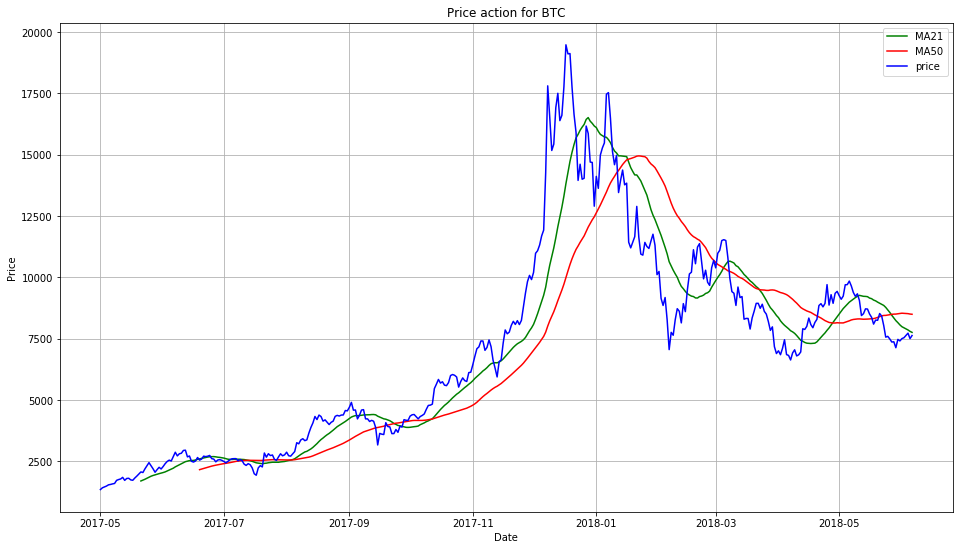

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

plot_moving_averages(
    coins=coins,
    symbol='BTC',
    leading_window=21,
    lagging_window=50,
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия/


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

Иными словами сравниваем 2 подхода:
- сразу в начальный момент времени купить крипты на все деньги - обычное инвестирование
- ждать подходящих моментов и покупать только в них равными порциями - стратегия

Считайте, что суммарное количество вложенных денег в обоих подходах одинаковое.

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [ ]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21,
    min=1,
    max=200,
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1,
    max=200,
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0,
    max=0.20,
    step=0.001,
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

## 9. Отказ от ответственности

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.